# Customer Segmentation and next item prediction:

# Origin: 

This online retail dataset is collected from UCI machine learning repository

# Data Set Information:

This is a transactional data set which contains all the transactions occurring between 01/12/2009 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

# Attribute Information:

- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
- UnitPrice: Unit price. Numeric, Product price per unit in sterling.
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal, the name of the country where each customer resides.

# Problem Statement: 

Retail business is one of the huge fields where we can apply data science and machine learning. We as retail business owners, use transaction data, which is recording data result in connections with sales-purchase activities at a company, to identify and understand customer’s data in all aspects and to perform any operation and get data insights.

In these recent years, transaction data have been prevalently used as research objects in means of discovering new information.  FFor instance, to increase sales of our store, we need to explore all possible ways like creating promotions, applying discounts on items, etc.  So, we start asking a question, which products should be discounted? How do we apply the discounts? Are there any patterns that occur to our sales, so that we could apply the promotion more accurately? To answer these types of questions, the only way is to understand data, perform some analysis and conclude with proper answer.


### Some of the ways which we follow to help retailers are:  


#### Customer Segmentation:

As we know, the needs and wants of customers are different from each other and companies are now using different techniques to better identify their needs to satisfy them. One of the ways of targeting customers is by grouping similar customers which is known as customer segmentation, an important technique which divides data or customers into segments and hence it helps in targeting selected segments based on its competitive advantages. Also, this customer segmentation is considered as a tool which has virtually unlimited potential to guide companies towards effective ways to market products to introduce new ones.

#### Market basket analysis: 

Along with this customer segmentation, transaction data can be utilized as to draw the relation of each purchased item inside the customer’ basket. By that information, we can make use of it for effective product display/assortment to attract customers’ interest. The commonly used application to analyze transaction data customers’ shopping basket is market basket analysis.


Market Basket Analysis is an analysis mode performed on customer behavior whilst shopping at a supermarket through the means identifying association and connections among various items placed by the customers in their shopping baskets. In specific, Market Basket Analysis aims at simultaneously identifying the most frequently purchased items by customers. Using market basket analysis mode, a knowledge of what are the items often purchased by the customers simultaneously and having an opportunity to be promoted can be obtained. With regards to the objective of market basket analysis mode to decide which products that customers purchase at the same time, whereby the name of this mode is taken from the behavior of the customers in placing shopping products into their shopping baskets or shopping list. Over identifying shopping basket pattern of a customer will significantly be able to help a company in using that information in respect of business strategy needs, one of them is placing the most frequently purchased products simultaneously into one specific area or by giving discounts on predicted products to increase sale. 

# Steps: 

In this notebook, we will follow the following steps:

- Step 1 - Loading the required libraries and modules.
- Step 2 - Loading the data and performing basic data checks.

Performing some exploratory data analysis (This step was done in previous notebook)

##### Part_1: 
- Step 3 - Data preparation for RFM
- Step 4 - Building Model
- Step 5 - Final analysis of RFM and K-means

##### Part_2:
- Step 6 - Data preparation and building model for MBA
- Step 7 - Final analysis

# Step_1: Import libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler
import datetime as dt
from collections import Counter
from mlxtend.frequent_patterns import association_rules, apriori
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import pycountry
import pycountry_convert as pc
from sklearn.metrics import silhouette_score






%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Step_2: Reading and Cleaning Data

In [2]:
df = pd.read_csv('C:/Users/Subbu/Documents/Github2021/DSgithub/labs/CapstoneData_trials/online_retail_II.csv')
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [3]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [4]:
df = df.dropna()
df.reset_index(drop = True)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
824359,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
824360,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
824361,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
824362,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
df['Quantity'].unique()

array([    12,     48,     24,     10,     18,      3,     16,      4,
            2,      6,      8,      1,     28,     30,     60,     32,
           56,      9,     25,     36,     20,    -12,     -6,     -4,
          -24,     -3,     -2,    576,    288,     27,     64,    160,
            5,     -1,     72,     50,     54,      7,    800,     11,
           58,    192,     96,    144,    100,    180,    216,     15,
          240,    108,     33,     90,     81,    -81,    -48,     17,
           -5,     40,     -8,     -9,     13,     21,    120,    200,
          168,     19,    280,    128,   -150,    -18,    -23,     80,
          300,    450,     14,     61,    480,     -7,     46,    504,
           45,   4320,   5184,   4008,     22,    600,    505,    500,
           23,     47,    432,    252,     75,    -16,   -504,   -600,
         -252,   -246,    -36,    360,    107,     49,     42,     66,
          -10,     34,     52,    400,     70,    936,    -32,    -60,
      

In [6]:
df = df[df.Quantity > 0].reset_index(drop = True)
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
805615,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
805616,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
805617,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
805618,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [7]:
df = df[df.Price > 0].reset_index(drop = True)
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
805544,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
805545,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
805546,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
805547,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [8]:
df['Sale'] = df['Quantity'] * df['Price']
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sale
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
805544,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
805545,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
805546,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
805547,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85


In [9]:
# df[df['Description']]
# df['StockCode'].value_counts().reset_index()

# Part_1: Customer Segmentation
# Step 3 : Data Preparation

We are going to analyze the Customers based on below 3 factors:

- R (Recency): Number of days since last purchase
- F (Frequency): Number of transactions
- M (Monetary): Total amount of transactions (revenue contributed)

In [10]:
# New Attribute : Monetary

df_m = df.groupby('Customer ID')['Sale'].sum()
df_m = df_m.reset_index()
df_m

,Customer ID,Sale
0,12346.0,77556.46
1,12347.0,5633.32
2,12348.0,2019.40
3,12349.0,4428.69
4,12350.0,334.40
...,...,...
5873,18283.0,2736.65
5874,18284.0,461.68
5875,18285.0,427.00
5876,18286.0,1296.43


In [11]:
# New Attribute : Frequency

df_f = df.groupby('Customer ID')['Invoice'].count()
df_f = df_f.reset_index()
df_f.columns = ['Customer ID', 'Frequency']
df_f.head()

,Customer ID,Frequency
0,12346.0,34
1,12347.0,253
2,12348.0,51
3,12349.0,175
4,12350.0,17


In [12]:
# Merging the two dfs

df_rfm = pd.merge(df_m, df_f, on='Customer ID', how='inner')
df_rfm.head()

,Customer ID,Sale,Frequency
0,12346.0,77556.46,34
1,12347.0,5633.32,253
2,12348.0,2019.40,51
3,12349.0,4428.69,175
4,12350.0,334.40,17


In [13]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%Y-%m-%d %H:%M')


In [14]:
max_date = max(df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [15]:
# Compute the difference between max date and transaction date

df['Difference'] = max_date - df['InvoiceDate']
df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sale,Difference
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,738 days 05:05:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,738 days 05:05:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,738 days 05:05:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,738 days 05:05:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,738 days 05:05:00


In [16]:
df_r = df.groupby('Customer ID')['Difference'].min()
df_r = df_r.reset_index()
df_r.columns = ['Customer ID', 'Difference']
df_r

,Customer ID,Difference
0,12346.0,325 days 02:49:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00
...,...,...
5873,18283.0,3 days 00:48:00
5874,18284.0,431 days 01:17:00
5875,18285.0,660 days 02:26:00
5876,18286.0,476 days 00:53:00


In [17]:
# Extract number of days only

df_r['Difference'] = df_r['Difference'].dt.days
df_r.head()

,Customer ID,Difference
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [18]:
# Merge tha dataframes to get the final RFM dataframe

df_rfm = pd.merge(df_rfm, df_r, on='Customer ID', how='inner')
df_rfm.columns = ['Customer ID', 'Monetary', 'Frequency', 'Recency']
df_rfm.head()

,Customer ID,Monetary,Frequency,Recency
0,12346.0,77556.46,34,325
1,12347.0,5633.32,253,1
2,12348.0,2019.40,51,74
3,12349.0,4428.69,175,18
4,12350.0,334.40,17,309


Text(0.5, 0, 'Attributes')

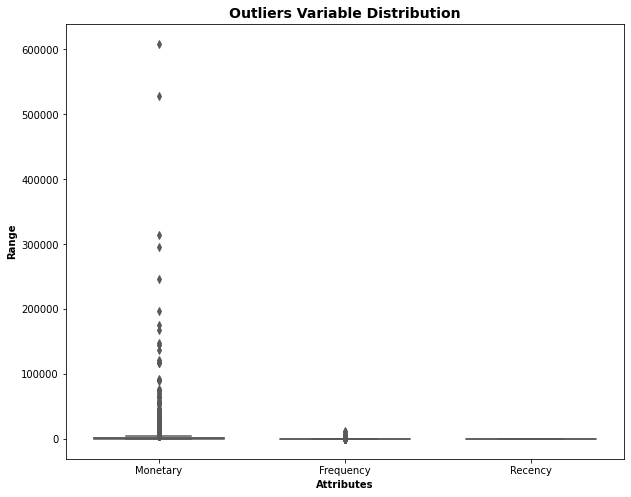

In [19]:
# Outlier Analysis of Amount Frequency and Recency

attributes = ['Monetary','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = df_rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [20]:
# Removing (statistical) outliers for Amount
Q1 = df_rfm.Monetary.quantile(0.05)
Q3 = df_rfm.Monetary.quantile(0.95)
IQR = Q3 - Q1
df_rfm = df_rfm[(df_rfm.Monetary >= Q1 - 1.5*IQR) & (df_rfm.Monetary <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = df_rfm.Recency.quantile(0.05)
Q3 = df_rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
df_rfm = df_rfm[(df_rfm.Recency >= Q1 - 1.5*IQR) & (df_rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = df_rfm.Frequency.quantile(0.05)
Q3 = df_rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
df_rfm = df_rfm[(df_rfm.Frequency >= Q1 - 1.5*IQR) & (df_rfm.Frequency <= Q3 + 1.5*IQR)]

Text(0.5, 0, 'Attributes')

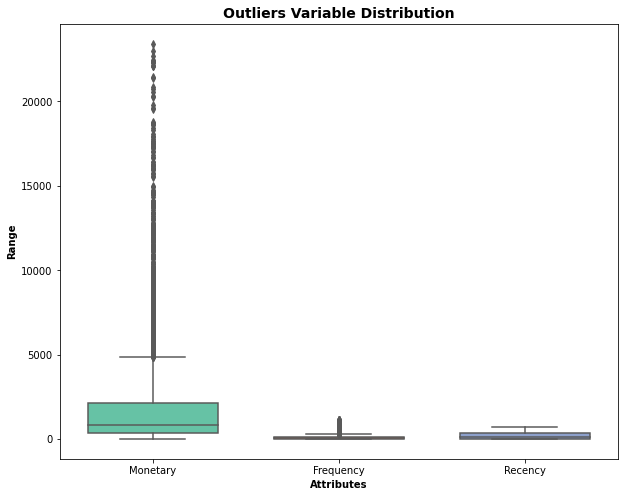

In [21]:
# Outlier Analysis of Amount Frequency and Recency

attributes = ['Monetary','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = df_rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

### Rescaling the Attributes
It is extremely important to rescale the variables so that they have a comparable scale.| There are two common ways of rescaling:

- Min-Max scaling
- Standardisation (mean-0, sigma-1)

Here, we will use Standardisation Scaling.

In [22]:
# Rescaling the attributes

rfm = df_rfm[['Monetary', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
df_rfm_scaled = scaler.fit_transform(rfm)
df_rfm_scaled.shape

(5766, 3)

In [23]:
df_rfm_scaled = pd.DataFrame(df_rfm_scaled)
df_rfm_scaled.columns = ['Monetary', 'Frequency', 'Recency']
df_rfm_scaled.head()

,Monetary,Frequency,Recency
0,1.266755,0.891085,-0.965767
1,0.030949,-0.384849,-0.617544
2,0.854823,0.398398,-0.884674
3,-0.545249,-0.599610,0.503447
4,-0.556694,-0.574344,0.813508


In [24]:
df_rfm_scaled.describe()

,Monetary,Frequency,Recency
count,5.766000e+03,5.766000e+03,5.766000e+03
mean,-2.181937e-16,2.267235e-17,-7.031798e-17
std,1.000087e+00,1.000087e+00,1.000087e+00
min,-6.585905e-01,-7.006739e-01,-9.705369e-01
25%,-5.427526e-01,-5.806603e-01,-8.417422e-01
50%,-3.657641e-01,-3.785322e-01,-4.935195e-01
75%,7.559148e-02,1.457375e-01,8.468996e-01
max,7.348795e+00,6.449607e+00,2.549852e+00


## Step 4 : Building the Model

K-Means Clustering:

K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

The algorithm works as follows:

- First we initialize k points, called means, randomly.
- We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items  categorized in that mean so far.
- We repeat the process for a given number of iterations and at the end, we have our clusters.

In [25]:
# k-means with some arbitrary k

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(df_rfm_scaled)

kmeans.labels_

array([3, 2, 3, ..., 1, 1, 3])

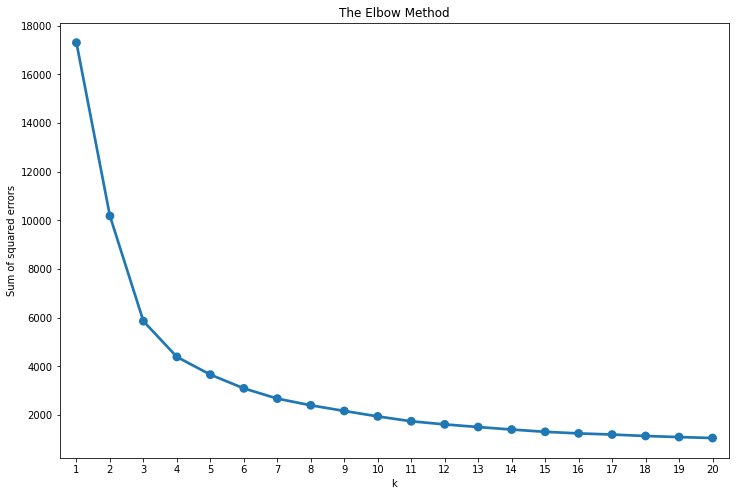

In [26]:
sse = {}
# Fit KMeans and calculate SSE for each k
for k in range(1, 21):
  
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(df_rfm_scaled)
    
    # Assign sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_
    
# Plotting the elbow plot
plt.figure(figsize=(12,8))
plt.title('The Elbow Method')
plt.xlabel('k'); 
plt.ylabel('Sum of squared errors')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

### Silhouette Analysis

silhouette score = p−qmax(p,q)
 
p  is the mean distance to the points in the nearest cluster that the data point is not a part of

q  is the mean intra-cluster distance to all the points in its own cluster.

The value of the silhouette score range lies between -1 to 1.

A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [27]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_rfm_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_rfm_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5525705948110912
For n_clusters=3, the silhouette score is 0.49978427107627593
For n_clusters=4, the silhouette score is 0.4952537980924356
For n_clusters=5, the silhouette score is 0.48999571942456405
For n_clusters=6, the silhouette score is 0.4453615248332307
For n_clusters=7, the silhouette score is 0.4252760531701746
For n_clusters=8, the silhouette score is 0.4168793116311393


Hence, based on elbow method and silhouette score, we have chosen cluster value 3

In [28]:
# k-means with some arbitrary k

kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df_rfm_scaled)

kmeans.labels_

array([2, 1, 1, ..., 0, 0, 1])

In [29]:
# assign the label
df_rfm['Cluster_Id'] = kmeans.labels_
df_rfm.head()

,Customer ID,Monetary,Frequency,Recency,Cluster_Id
1,12347.0,5633.32,253,1,2
2,12348.0,2019.40,51,74,1
3,12349.0,4428.69,175,18,1
4,12350.0,334.40,17,309,0
5,12351.0,300.93,21,374,0


In [30]:
df_rfm_scaled

,Monetary,Frequency,Recency
0,1.266755,0.891085,-0.965767
1,0.030949,-0.384849,-0.617544
2,0.854823,0.398398,-0.884674
3,-0.545249,-0.599610,0.503447
4,-0.556694,-0.574344,0.813508
...,...,...,...
5761,0.276218,5.521081,-0.956226
5762,-0.501725,-0.530128,1.085408
5763,-0.513584,-0.631192,2.177778
5764,-0.216276,-0.283785,1.300066


In [31]:
# y_kmeans = kmeans.predict(df_rfm_scaled)

# fig = plt.figure(figsize = (15,3))
# plt.scatter(df_rfm_scaled.loc[:, 0], df_rfm_scaled.loc[:, 1], c=y_kmeans, s=50, cmap='viridis')

# centers = kmeans.cluster_centers_
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


Text(0.5, 0, 'Cluster_ID')

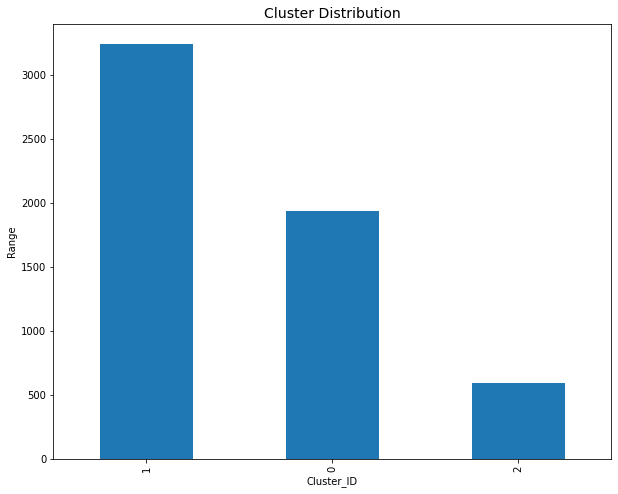

In [32]:
df_rfm['Cluster_Id'].value_counts().plot(kind = 'bar')

plt.title("Cluster Distribution", fontsize = 14)
plt.ylabel("Range")
plt.xlabel("Cluster_ID")

In [33]:
df_rfm

,Customer ID,Monetary,Frequency,Recency,Cluster_Id
1,12347.0,5633.32,253,1,2
2,12348.0,2019.40,51,74,1
3,12349.0,4428.69,175,18,1
4,12350.0,334.40,17,309,0
5,12351.0,300.93,21,374,0
...,...,...,...,...,...
5873,18283.0,2736.65,986,3,2
5874,18284.0,461.68,28,431,0
5875,18285.0,427.00,12,660,0
5876,18286.0,1296.43,67,476,0


In [34]:
df_merged = pd.merge(right=df_rfm[['Customer ID','Cluster_Id']], left=df, left_on='Customer ID', right_on='Customer ID')
df_merged

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sale,Difference,Cluster_Id
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,738 days 05:05:00,1
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,738 days 05:05:00,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,738 days 05:05:00,1
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,738 days 05:05:00,1
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,738 days 05:05:00,1
...,...,...,...,...,...,...,...,...,...,...,...
645369,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09 12:16:00,1.25,12713.0,Germany,15.00,0 days 00:34:00,1
645370,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09 12:16:00,0.85,12713.0,Germany,10.20,0 days 00:34:00,1
645371,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09 12:16:00,0.85,12713.0,Germany,10.20,0 days 00:34:00,1
645372,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09 12:16:00,2.08,12713.0,Germany,24.96,0 days 00:34:00,1


In [35]:
df_merged['Year'] = df_merged['InvoiceDate'].dt.year 
df_merged['Month'] = df_merged['InvoiceDate'].dt.month 


In [36]:
df_merged

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sale,Difference,Cluster_Id,Year,Month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,738 days 05:05:00,1,2009,12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,738 days 05:05:00,1,2009,12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,738 days 05:05:00,1,2009,12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,738 days 05:05:00,1,2009,12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,738 days 05:05:00,1,2009,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
645369,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09 12:16:00,1.25,12713.0,Germany,15.00,0 days 00:34:00,1,2011,12
645370,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09 12:16:00,0.85,12713.0,Germany,10.20,0 days 00:34:00,1,2011,12
645371,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09 12:16:00,0.85,12713.0,Germany,10.20,0 days 00:34:00,1,2011,12
645372,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09 12:16:00,2.08,12713.0,Germany,24.96,0 days 00:34:00,1,2011,12


In [37]:
df_0 = df_merged[df_merged['Cluster_Id'] == 0]

In [1]:
# df_0

In [39]:
df_0['Sale'].agg(sum)

1248606.942

In [40]:
# df_0['Month'].value_counts()

In [41]:
df_0['Year'].value_counts()

2010    64996
2009     6076
2011     5251
Name: Year, dtype: int64

In [42]:
df_1 = df_merged[df_merged['Cluster_Id'] == 1].reset_index()

In [43]:
df_1['Sale'].agg(sum)

4866036.339000001

In [44]:
# df_1['Month'].value_counts()

In [45]:
df_1['Year'].value_counts()

2011    166392
2010    120373
2009      7567
Name: Year, dtype: int64

In [46]:
df_2 = df_merged[df_merged['Cluster_Id'] == 2].reset_index()

In [47]:
df_2['Sale'].agg(sum)

5007362.983999999

In [48]:
# df_2['Month'].value_counts()

In [49]:
df_2['Year'].value_counts()

2010    138914
2011    125552
2009     10253
Name: Year, dtype: int64

Text(0.5, 0, 'Cluster_ID')

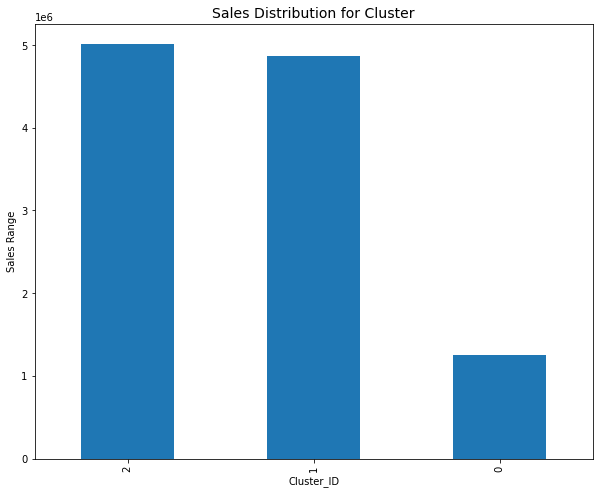

In [50]:
df_merged['Sale'].groupby(df_merged['Cluster_Id']).agg('sum').sort_values(ascending = False).plot(kind = 'bar')

plt.title("Sales Distribution for Cluster", fontsize = 14)
plt.ylabel("Sales Range")
plt.xlabel("Cluster_ID")

In [51]:
# df_merged['Sale'].groupby(df_merged['Year']).agg('sum').sort_values(ascending = False).plot(kind = 'bar')

# plt.title("Sales Distribution for each year", fontsize = 14)
# plt.ylabel("Sales Range")
# plt.xlabel("Year")

array([<AxesSubplot:ylabel='Sale'>], dtype=object)

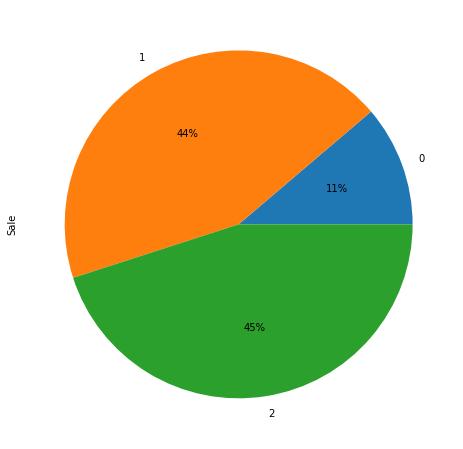

In [52]:
df_pie = df_merged['Sale'].groupby(df_merged['Cluster_Id']).agg('sum')
df_pie.plot(kind='pie', subplots=True,autopct='%.0f%%')

Text(0.5, 0, 'Cluster_ID')

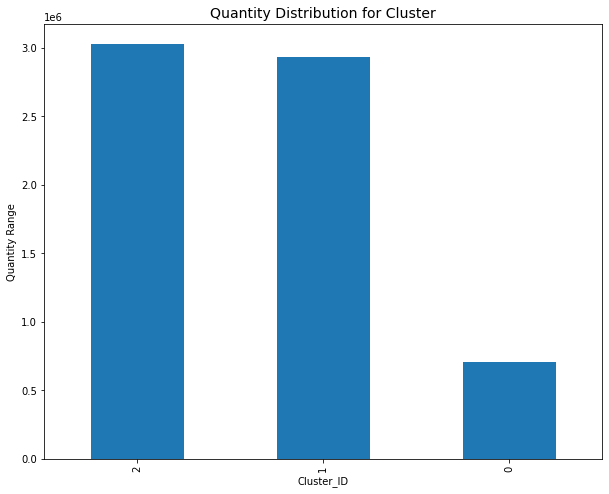

In [53]:
df_merged['Quantity'].groupby(df_merged['Cluster_Id']).agg('sum').sort_values(ascending = False).plot(kind = 'bar')

plt.title("Quantity Distribution for Cluster", fontsize = 14)
plt.ylabel("Quantity Range")
plt.xlabel("Cluster_ID")

array([<AxesSubplot:ylabel='Quantity'>], dtype=object)

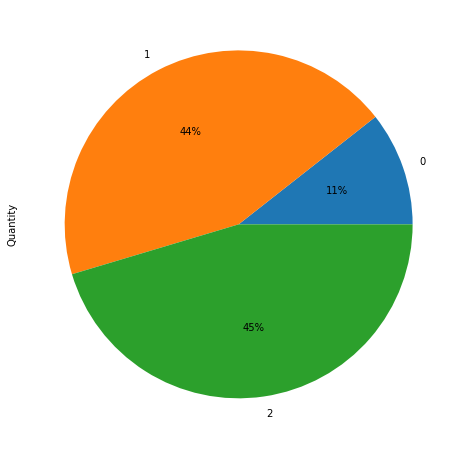

In [54]:

df_pie = df_merged['Quantity'].groupby(df_merged['Cluster_Id']).agg('sum')

df_pie.plot(kind='pie', subplots=True,autopct='%.0f%%')

Text(0.5, 1.0, 'Cluster Id vs Monetary')

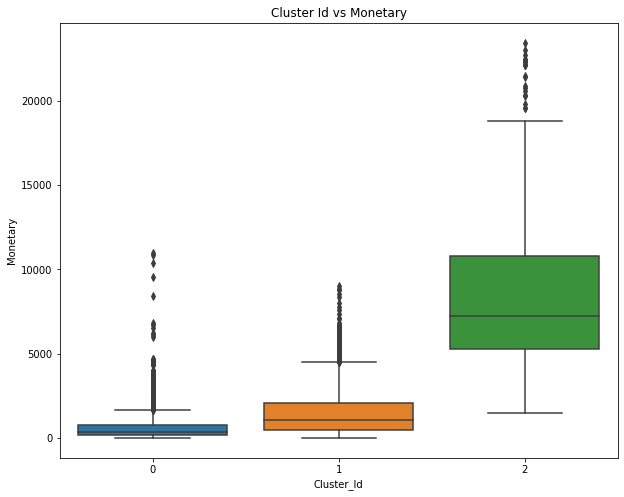

In [55]:
# Box plot to visualize Cluster Id vs Monetary
sns.boxplot(x='Cluster_Id', y='Monetary', data=df_rfm)
plt.title('Cluster Id vs Monetary')

array([<AxesSubplot:ylabel='Monetary'>], dtype=object)

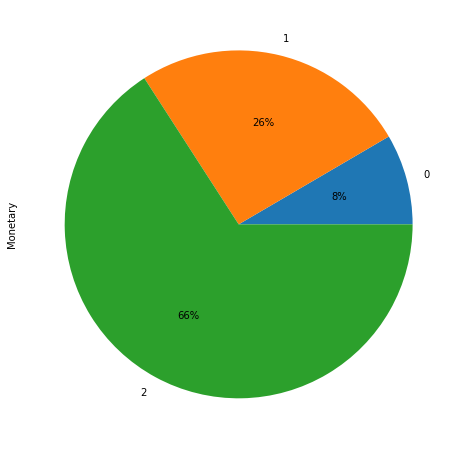

In [56]:
df_pie = df_rfm['Monetary'].groupby(df_rfm['Cluster_Id']).agg('sum')

df_pie.plot(kind='pie', subplots=True,autopct='%.0f%%')

Text(0.5, 1.0, 'Cluster Id vs Frequency')

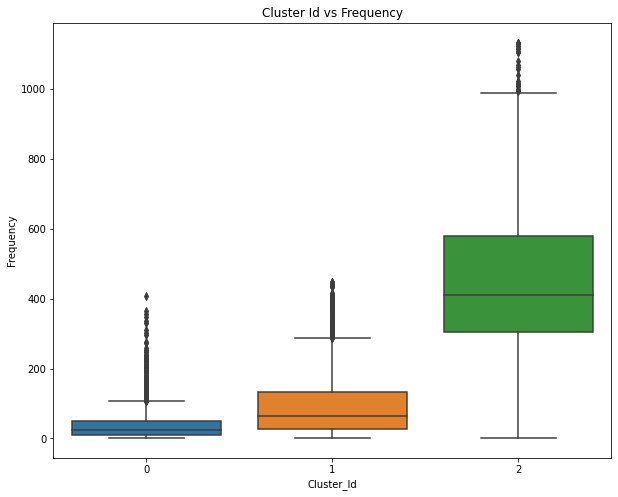

In [57]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Frequency', data=df_rfm)
plt.title('Cluster Id vs Frequency')

array([<AxesSubplot:ylabel='Frequency'>], dtype=object)

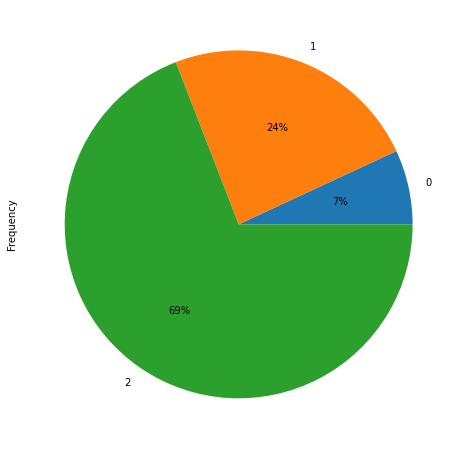

In [58]:
df_pie = df_rfm['Frequency'].groupby(df_rfm['Cluster_Id']).agg('sum')

df_pie.plot(kind='pie', subplots=True,autopct='%.0f%%')

Text(0.5, 1.0, 'Cluster Id vs Recency')

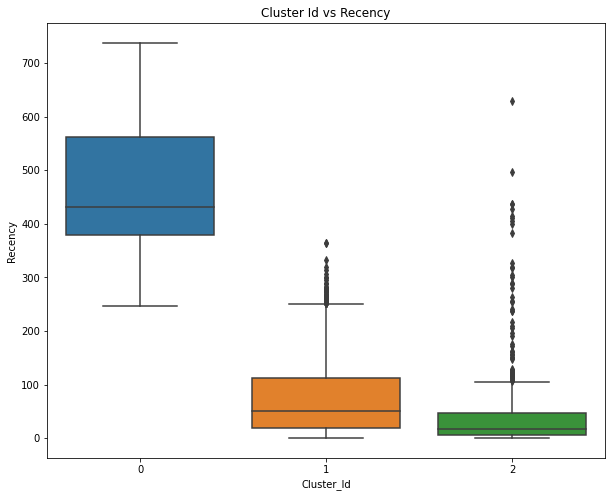

In [59]:
# Box plot to visualize Cluster Id vs Recency

sns.boxplot(x='Cluster_Id', y='Recency', data=df_rfm)
plt.title('Cluster Id vs Recency')

array([<AxesSubplot:ylabel='Recency'>], dtype=object)

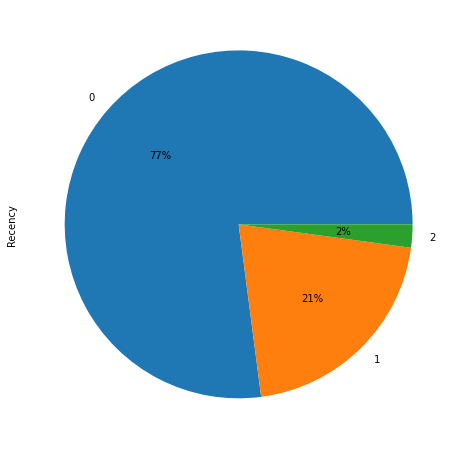

In [60]:
df_rec = df_rfm['Recency'].groupby(df_rfm['Cluster_Id']).agg('sum')
#  df_rfm['Recency'].groupby(df_rfm['Cluster_Id']).agg(sum).sort_values(ascending = False)
df_rec.plot(kind='pie', subplots=True,autopct='%.0f%%')

In [61]:
df_rfm

,Customer ID,Monetary,Frequency,Recency,Cluster_Id
1,12347.0,5633.32,253,1,2
2,12348.0,2019.40,51,74,1
3,12349.0,4428.69,175,18,1
4,12350.0,334.40,17,309,0
5,12351.0,300.93,21,374,0
...,...,...,...,...,...
5873,18283.0,2736.65,986,3,2
5874,18284.0,461.68,28,431,0
5875,18285.0,427.00,12,660,0
5876,18286.0,1296.43,67,476,0


In [62]:
data_1 = df_rfm['Monetary'].groupby(df_rfm['Cluster_Id']).agg(sum).sort_values(ascending = False)
data_1 = data_1.reset_index()
data_1

,Cluster_Id,Monetary
0,2,5007362.984
1,1,4866036.339
2,0,1248606.942


In [78]:
data_2 = df_rfm['Frequency'].groupby(df_rfm['Cluster_Id']).agg(sum).sort_values(ascending = False)
data_2 = data_2.reset_index()
data_2

,Cluster_Id,Frequency
0,1,294332
1,2,274719
2,0,76323


In [79]:
data_3 = df_rfm['Recency'].groupby(df_rfm['Cluster_Id']).agg(sum).sort_values(ascending = False)
data_3 = data_3.reset_index()
data_3

,Cluster_Id,Recency
0,0,904102
1,1,243854
2,2,25191


Text(0.5, 1.0, 'Monetary vs Frequency vs Recency')

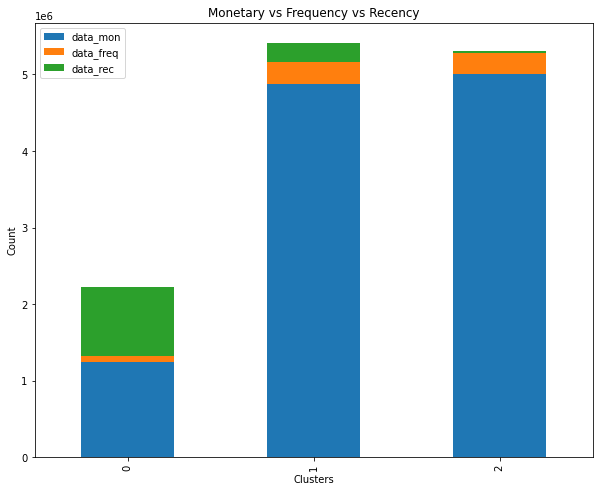

In [65]:
data = pd.DataFrame({
    "data_mon": [1248606.942,4866036.339,5007362.984],
    "data_freq": [76323,294332,274719],
    "data_rec":[904102,243854,25191]
    }, 
    index=[0,1,2])
data.plot(kind = 'bar',stacked = True)
plt.xlabel('Clusters')
plt.ylabel('Count')
plt.title('Monetary vs Frequency vs Recency')

From the above bar plot, we can interpret 
- Monetary: 2>1>0
- Frequency: 1>2>0
- Recency: 0>1>2

It means: 
- 2nd cluster have high `Monetary` and `Frequency` values and low `Recency` value. Hence, promising one
- 1st cluster have high `Monetary` and `Frequency` values and low `Recency` value but comparitevely less when compared to 2nd cluster. Hence, 2nd promising one
- 0th cluster is high `Recency` value and low `Monetary` and `Frequency` values. Hence, not promising one


# Step 5 : Final Analysis

Inference:
K-Means Clustering with 3 Cluster Ids

Customers with Cluster Id 2 are the customers with high amount of transactions as compared to other customers.

Customers with Cluster Id 1 are frequent buyers.

Customers with Cluster Id 0 are not recent buyers and hence least of importance from business point of view.


# Part_2:  Market Basket Analysis for next item prediction

## Step 6: Data preparation and building model for MBA 

Market basket analysis is a kind of knowledge discovery in data where this process can be followed in different fields of work. This discovery helps retailers gain more insights of data by finding most frequent item being purchased along with other items and hence helps to keep those items at one place or by applying discounts on predicted item which increases sales. 


Some of the rules that are needed to find association between items are: 

Support and Confidence: Using these two parameters, the significance of an associative rule can be figured. 

- `Support` (supporting value) is the percentage of combinations of product items in the database
        Support (A) = Num of transactions that contain A/ Total    Transactions
- While `confidence` (certainty value) is a value to determine the strength of inter-item relationships in association rules
        Confidence = P(A|B) = Num of transactions that contain A&B / Total transactions that contain A 
        
- `Lift`: This says how likely item B is purchased given item A. 
	Lift (A | B) = Support (A, B) / Support(A) * Support(B)



In [66]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sale,Difference
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,738 days 05:05:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,738 days 05:05:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,738 days 05:05:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,738 days 05:05:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,738 days 05:05:00
...,...,...,...,...,...,...,...,...,...,...
805544,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,0 days 00:00:00
805545,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0 days 00:00:00
805546,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0 days 00:00:00
805547,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,0 days 00:00:00


To make analysis simpler, we have taken sample of data where “Country” = ‘Australia’.

In [67]:
df = df[df['Country'] == 'Australia'].sample(100)
df.reset_index(drop = True)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sale,Difference
0,500008,22112,CHOCOLATE HOT WATER BOTTLE,3,2010-03-04 09:51:00,4.95,12431.0,Australia,14.85,645 days 02:59:00
1,525872,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2010-10-07 13:49:00,1.95,12393.0,Australia,15.60,427 days 23:01:00
2,558536,23100,SILVER BELLS TABLE DECORATION,12,2011-06-30 12:06:00,1.25,12424.0,Australia,15.00,162 days 00:44:00
3,569650,22539,MINI JIGSAW DOLLY GIRL,240,2011-10-05 12:44:00,0.36,12415.0,Australia,86.40,65 days 00:06:00
4,553546,21524,DOORMAT SPOTTY HOME SWEET HOME,10,2011-05-17 15:42:00,6.75,12415.0,Australia,67.50,205 days 21:08:00
...,...,...,...,...,...,...,...,...,...,...
95,553546,22992,REVOLVER WOODEN RULER,144,2011-05-17 15:42:00,1.65,12415.0,Australia,237.60,205 days 21:08:00
96,534659,22786,CUSHION COVER PINK UNION JACK,4,2010-11-23 13:38:00,5.95,12434.0,Australia,23.80,380 days 23:12:00
97,513987,22504,CABIN BAG VINTAGE RETROSPOT,1,2010-06-30 08:30:00,29.95,12415.0,Australia,29.95,527 days 04:20:00
98,553546,23253,16 PIECE CUTLERY SET PANTRY DESIGN,24,2011-05-17 15:42:00,12.50,12415.0,Australia,300.00,205 days 21:08:00


In [68]:
df.nunique()

Invoice        44
StockCode      92
Description    92
Quantity       28
InvoiceDate    44
Price          37
Customer ID    13
Country         1
Sale           76
Difference     44
dtype: int64

In the below cell, `df_basket` a data frame called basket data is created.This basket data contains the count of transactional data. This is done by grouping “Invoice” and “Description” and then getting values of “Quantity” of each purchased item. We can simply refer this as basket that a customer takes with him while shopping

In [69]:
df_basket = df.groupby(['Invoice', 'Description'])['Quantity'].sum().unstack().fillna(0)
df_basket

Description,16 PIECE CUTLERY SET PANTRY DESIGN,20 DOLLY PEGS RETROSPOT,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN RED AND CREAM,60 CAKE CASES VINTAGE CHRISTMAS,70'S ALPHABET WALL ART,ALARM CLOCK BAKELIKE RED,BINGO SET,BIRDHOUSE GARDEN MARKER,BLUE 3 PIECE POLKADOT CUTLERY SET,...,TOY TIDY SPACEBOY,TRAVEL SEWING KIT,VINTAGE CARAVAN GIFT WRAP,VINTAGE CARAVAN GREETING CARD,VINTAGE RED ENAMEL TRIM JUG,VINTAGE UNION JACK APRON,WHITE HEART CONFETTI IN TUBE,WOODLAND CHARLOTTE BAG,WOODLAND PARTY BAG + STICKER SET,WRAP I LOVE LONDON
Invoice,,,,,,,,,,,,,,,,,,,,,
498617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
500008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
502275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
509212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
509378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0
511680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
513987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,...,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,25.0
525872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now we encoded data with binary values. If an item is present in the basket, then its value is ‘1’ else ‘0’. 

In [70]:
def encode_units(x):
    if x <=0:
        return 0
    if x>=1:
        return 1

df_basket_plus = df_basket.applymap(encode_units)

In [71]:
df_basket_plus

Description,16 PIECE CUTLERY SET PANTRY DESIGN,20 DOLLY PEGS RETROSPOT,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN RED AND CREAM,60 CAKE CASES VINTAGE CHRISTMAS,70'S ALPHABET WALL ART,ALARM CLOCK BAKELIKE RED,BINGO SET,BIRDHOUSE GARDEN MARKER,BLUE 3 PIECE POLKADOT CUTLERY SET,...,TOY TIDY SPACEBOY,TRAVEL SEWING KIT,VINTAGE CARAVAN GIFT WRAP,VINTAGE CARAVAN GREETING CARD,VINTAGE RED ENAMEL TRIM JUG,VINTAGE UNION JACK APRON,WHITE HEART CONFETTI IN TUBE,WOODLAND CHARLOTTE BAG,WOODLAND PARTY BAG + STICKER SET,WRAP I LOVE LONDON
Invoice,,,,,,,,,,,,,,,,,,,,,
498617,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
500008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
502275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
507148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
509212,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
509378,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
511680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
513987,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
525872,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Then basket was filtered in the below cell, by allowing values which were repeated more than once

In [72]:
df_filter_basket = df_basket_plus[(df_basket_plus > 0).sum(axis = 1) >= 2]
df_filter_basket

Description,16 PIECE CUTLERY SET PANTRY DESIGN,20 DOLLY PEGS RETROSPOT,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN RED AND CREAM,60 CAKE CASES VINTAGE CHRISTMAS,70'S ALPHABET WALL ART,ALARM CLOCK BAKELIKE RED,BINGO SET,BIRDHOUSE GARDEN MARKER,BLUE 3 PIECE POLKADOT CUTLERY SET,...,TOY TIDY SPACEBOY,TRAVEL SEWING KIT,VINTAGE CARAVAN GIFT WRAP,VINTAGE CARAVAN GREETING CARD,VINTAGE RED ENAMEL TRIM JUG,VINTAGE UNION JACK APRON,WHITE HEART CONFETTI IN TUBE,WOODLAND CHARLOTTE BAG,WOODLAND PARTY BAG + STICKER SET,WRAP I LOVE LONDON
Invoice,,,,,,,,,,,,,,,,,,,,,
507148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
509378,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
511680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
513987,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
526756,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
529057,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536009,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0
540267,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
543989,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In this below cell, we have applied ‘Apriori’ algorithm using mlxtend library. With min support ‘0.03’ and max_length ‘3’

In [73]:
df_freq_items = apriori(df_filter_basket, min_support = 0.03, max_len = 3,use_colnames=True).sort_values('support', ascending = False).reset_index(drop = True)

In [74]:
df_freq_items['length'] = df_freq_items['itemsets'].apply(lambda x: len(x))
df_freq_items

,support,itemsets,length
0,0.090909,(MINI JIGSAW DOLLY GIRL),1
1,0.090909,(REGENCY CAKESTAND 3 TIER),1
2,0.090909,(3 STRIPEY MICE FELTCRAFT),1
3,0.090909,(ROUND STORAGE TIN VINTAGE LEAF),1
4,0.090909,(PAPER BUNTING RETROSPOT),1
...,...,...,...
491,0.045455,"(WRAP I LOVE LONDON , HOME SWEET HOME METAL SI...",2
492,0.045455,"(VINTAGE CARAVAN GREETING CARD , HOME SWEET HO...",2
493,0.045455,"(MINI JIGSAW SPACEBOY, HOME SWEET HOME METAL S...",2
494,0.045455,"(MINI JIGSAW DOLLY GIRL, HOME SWEET HOME METAL...",2


In the below cell, applied association rules with metric ‘lift’ to find the frequent pattern. i.e., finding most repeated items. Finally, we can view data frame with most repeated items

In [80]:
associ_rules = association_rules(df_freq_items, metric="lift", min_threshold=1).sort_values('lift', ascending = False).head(20).reset_index(drop = True)

In [81]:
from IPython.display import display, HTML
display(HTML(associ_rules.to_html()))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(GIRLS VINTAGE TIN SEASIDE BUCKET, BUFFALO BILL TREASURE BOOK BOX)",(JUMBO BAG PINK VINTAGE PAISLEY),0.045455,0.045455,0.045455,1.0,22.0,0.043388,inf
1,(FELTCRAFT DOLL EMILY),"(PINK POLKADOT WRAP , VINTAGE CARAVAN GIFT WRAP)",0.045455,0.045455,0.045455,1.0,22.0,0.043388,inf
2,(TEA PARTY WRAPPING PAPER ),"(PINK POLKADOT WRAP , FELTCRAFT DOLL EMILY)",0.045455,0.045455,0.045455,1.0,22.0,0.043388,inf
3,(PINK POLKADOT WRAP ),"(TEA PARTY WRAPPING PAPER , FELTCRAFT DOLL EMILY)",0.045455,0.045455,0.045455,1.0,22.0,0.043388,inf
4,"(TEA PARTY WRAPPING PAPER , FELTCRAFT DOLL EMILY)",(PINK POLKADOT WRAP ),0.045455,0.045455,0.045455,1.0,22.0,0.043388,inf
5,"(PINK POLKADOT WRAP , FELTCRAFT DOLL EMILY)",(TEA PARTY WRAPPING PAPER ),0.045455,0.045455,0.045455,1.0,22.0,0.043388,inf
6,"(PINK POLKADOT WRAP , TEA PARTY WRAPPING PAPER )",(FELTCRAFT DOLL EMILY),0.045455,0.045455,0.045455,1.0,22.0,0.043388,inf
7,(FELTCRAFT DOLL EMILY),"(PINK POLKADOT WRAP , TRAVEL SEWING KIT)",0.045455,0.045455,0.045455,1.0,22.0,0.043388,inf
8,(PINK POLKADOT WRAP ),"(FELTCRAFT DOLL EMILY, TRAVEL SEWING KIT)",0.045455,0.045455,0.045455,1.0,22.0,0.043388,inf
9,(TRAVEL SEWING KIT),"(PINK POLKADOT WRAP , FELTCRAFT DOLL EMILY)",0.045455,0.045455,0.045455,1.0,22.0,0.043388,inf


# Step 7: Final analysis

In [82]:
# associ_rules['length'] = df_freq_items['itemsets'].apply(lambda x: len(x))

display(HTML(associ_rules.to_html()))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(GIRLS VINTAGE TIN SEASIDE BUCKET, BUFFALO BILL TREASURE BOOK BOX)",(JUMBO BAG PINK VINTAGE PAISLEY),0.045455,0.045455,0.045455,1.0,22.0,0.043388,inf
1,(FELTCRAFT DOLL EMILY),"(PINK POLKADOT WRAP , VINTAGE CARAVAN GIFT WRAP)",0.045455,0.045455,0.045455,1.0,22.0,0.043388,inf
2,(TEA PARTY WRAPPING PAPER ),"(PINK POLKADOT WRAP , FELTCRAFT DOLL EMILY)",0.045455,0.045455,0.045455,1.0,22.0,0.043388,inf
3,(PINK POLKADOT WRAP ),"(TEA PARTY WRAPPING PAPER , FELTCRAFT DOLL EMILY)",0.045455,0.045455,0.045455,1.0,22.0,0.043388,inf
4,"(TEA PARTY WRAPPING PAPER , FELTCRAFT DOLL EMILY)",(PINK POLKADOT WRAP ),0.045455,0.045455,0.045455,1.0,22.0,0.043388,inf
5,"(PINK POLKADOT WRAP , FELTCRAFT DOLL EMILY)",(TEA PARTY WRAPPING PAPER ),0.045455,0.045455,0.045455,1.0,22.0,0.043388,inf
6,"(PINK POLKADOT WRAP , TEA PARTY WRAPPING PAPER )",(FELTCRAFT DOLL EMILY),0.045455,0.045455,0.045455,1.0,22.0,0.043388,inf
7,(FELTCRAFT DOLL EMILY),"(PINK POLKADOT WRAP , TRAVEL SEWING KIT)",0.045455,0.045455,0.045455,1.0,22.0,0.043388,inf
8,(PINK POLKADOT WRAP ),"(FELTCRAFT DOLL EMILY, TRAVEL SEWING KIT)",0.045455,0.045455,0.045455,1.0,22.0,0.043388,inf
9,(TRAVEL SEWING KIT),"(PINK POLKADOT WRAP , FELTCRAFT DOLL EMILY)",0.045455,0.045455,0.045455,1.0,22.0,0.043388,inf


From the above generated rules, we can say “GIRLS VINTAGE TIN SEASIDE BUCKET, BUFFALO BILL TREASURE BOOK BOX” and “JUMBO BAG PINK VINTAGE PAISLEY” are having high association rules.  This is interpreted based on “lift”. i.e., lift and association between items are directly proportional to each other. The higher the lift, the greater the association will be. Here, “lift” value is high which is ‘22’. Generally, value which is greater than ‘1’ can be considered as good predictor. But our values here are having ‘22’ and hence considered as super good predictors that can tell these items are sold together. 
Along with this we can also interpret that, support value “GIRLS VINTAGE TIN SEASIDE BUCKET, BUFFALO BILL TREASURE BOOK BOX” and “JUMBO BAG PINK VINTAGE PAISLEY” are 0.0454% which means there are 4.54% out of total transaction that these 3 items were sold together. 


However, confidence can we used to extract even more information. As we know confidence value is influence with antecedent and consequent, if antecedent > consequent, then our rule number 1 will be applied else number 2. 


In this case, the antecedent value is equal to consequent value. It means we will apply rule number 1 and 2 which is “GIRLS VINTAGE TIN SEASIDE BUCKET, BUFFALO BILL TREASURE BOOK BOX” <-> “JUMBO BAG PINK VINTAGE PAISLEY”. It means, if customer tends to buy “GIRLS VINTAGE TIN SEASIDE BUCKET, BUFFALO BILL TREASURE BOOK BOX” then after that item they will buy “JUMBO BAG PINK VINTAGE PAISLEY” or viceversa. This could be a very valuable information because we are now aware which products should we put the discounts on. We could give a discount on “GIRLS VINTAGE TIN SEASIDE BUCKET, BUFFALO BILL TREASURE BOOK BOX” if a customer buy “JUMBO BAG PINK VINTAGE PAISLEY” or viceversa. Or they can we put these two items together.  
